In [1]:
import math
import json
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
%load_ext autoreload
%autoreload 2


In [103]:
from htmresearch.support.cans.utils import *
from htmresearch.support.cans.basic_dynamics import *
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


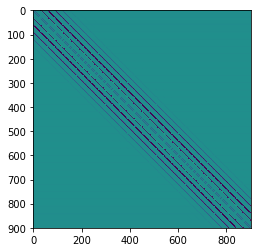

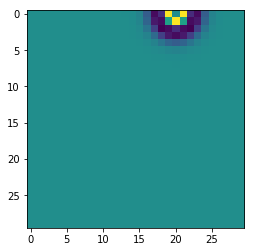

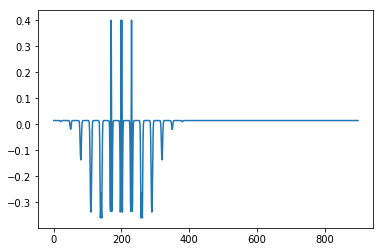

In [4]:



xy_ratio = 1.
rx  = 20.
ry  = rx*xy_ratio
nx = 30
ny = nx*int(xy_ratio)
n  = nx*ny 



X = np.indices((nx,ny)).reshape((2,-1)).T/np.array([[float(nx), float(ny)]])
X[:,0] *= rx
X[:,1] *= ry


D = np.zeros((n, n))
for i in range(n):
    for j in range(n):
            D[i,j] = np.linalg.norm( X[i] - X[j])

        

J = mexican_hat
# J = W_zero



W = create_W(J, D, s=1.)



plt.imshow(W)
plt.show()

plt.imshow(W[20].reshape((nx,ny)))
plt.show()

plt.plot(W[200])
plt.show()



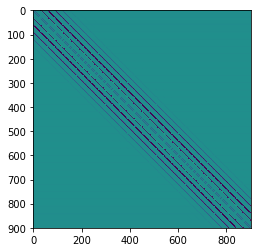

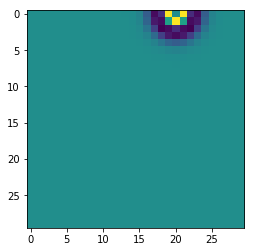

IndexError: index 1570 is out of bounds for axis 0 with size 900

In [21]:
plt.imshow(W)
plt.show()

plt.imshow(W[20].reshape((nx,ny)))
plt.show()

img = W[1570].reshape((nx,ny))
plt.plot(W[1570])
plt.show()
print np.where(np.absolute(img) < 0.001)
plt.imshow(img)
plt.show()

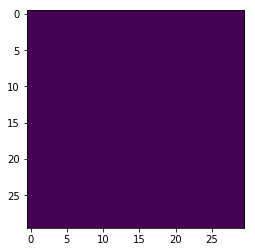

In [6]:
mask = np.ones((nx,ny))


# num_areas = 6
# R = np.array([
#     [20,20],
#     [20,45],
#     [50,33],
#     [60,60]
# ])/np.array([[float(nx), float(ny)]])
# R[:,0] *= rx
# R[:,1] *= ry
# print R.shape

# mask = mask.reshape(-1)
# for i in range(n):
#     dist_to_pins = np.amin( np.linalg.norm(R - X[i].reshape((1,2)), axis=1)) 
#     if dist_to_pins < 2:
#         mask[i] = 0.

plt.imshow(mask.reshape((nx,ny)))
mask = mask.reshape(-1)


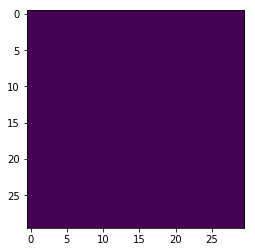

In [7]:
beta_mask = np.ones((nx,ny))*2.
# beta_mask = beta_mask*np.linspace(1.0,4.,num=ny).reshape((1,ny))



# mask[10:20,50:60]    = 0.
# # mask[10:20,115:125]  = 0.


# R = np.indices((nx,ny)).reshape((2,-1)).T/np.array([[float(nx), float(ny)]])
# R[:,0] *= rx
# R[:,1] *= ry

# R = R[np.random.choice(n,size=5, replace=False)]

# rnd = np.random.sample(5)

# beta_mask = np.zeros(n)
# for i in range(n):
#     j = np.argmin( np.linalg.norm(R - X[i], axis=1))
#     beta_mask[i] = 2.5 + (rnd[j] - 0.5)*1.

    
plt.imshow(beta_mask.reshape((nx,ny)))
plt.show()
beta_mask = beta_mask.reshape(-1)


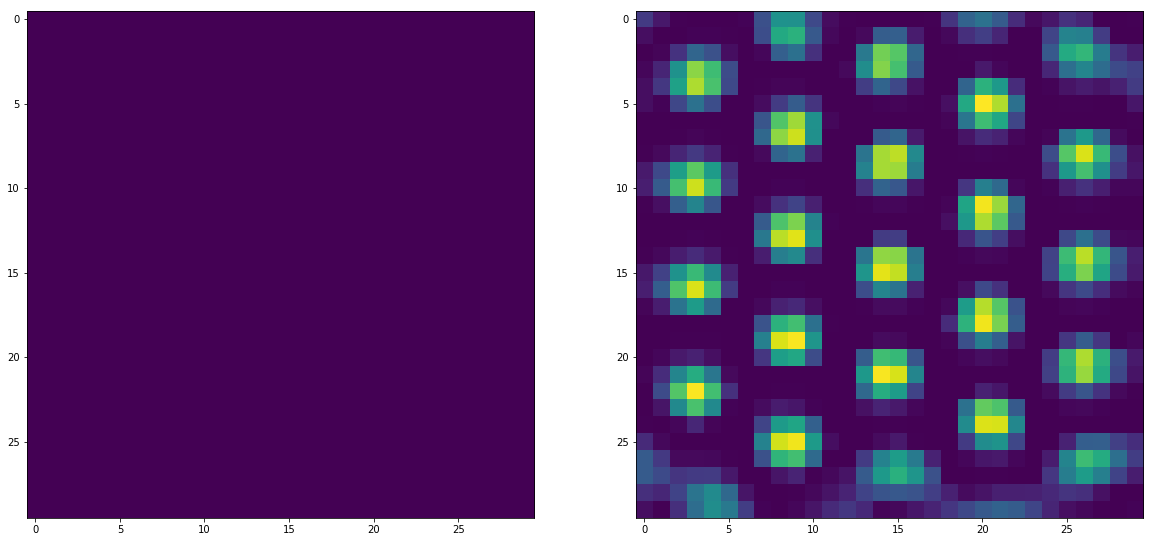

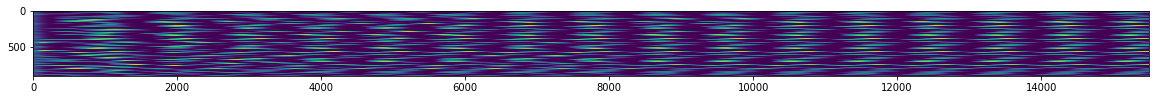

In [10]:
from htmresearch.support.gridcells.utils import cross_correlate
from scipy import ndimage
import numpy.fft as fft
from scipy.special import expit




T = 15500
# X = np.linspace(0.2,0.4,num=T)

S = np.zeros((T,n))




S[0] = np.zeros(n)
# S[0] = np.random.sample(n)*0.001


Beta = np.ones((T,n))*0.0




for t in range(1,T):
    
    s = S[t-1]
    b = np.zeros(n)
    
    tonic = 0.01
    beta  = Beta[t-1]
    
    s_ = evolve_step(W, b  + tonic, s, beta_mask*beta) 
#     s_ = evolve_step(W, b  + tonic, s) 
    S[t]    = s_

    alpha = 0.01
    Beta[t] = (1. - alpha)*Beta[t-1] - alpha*(s_ - np.mean(s_))


fig, ax = plt.subplots(1, 2, figsize=(20, 10));
ax[0].imshow(S[0].reshape((nx,ny)), label="$s_0$")
ax[1].imshow(S[-1].reshape((nx,ny)), label="$s_1$")
plt.show()


plt.figure(figsize=(20,5))
plt.imshow(S.T)
plt.show()





done


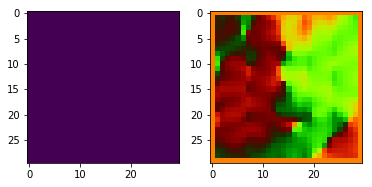

In [114]:
import matplotlib.animation as animation


def update(num, data, a):
    a[0].set_data(data[num].reshape((nx,ny)))
    
    
    u = mean_flow(U, num) 
    v = mean_flow(V, num) 
    c = flow_to_color(u,v)
    a[1].set_data(c.reshape((nx,ny,3)))

    return a,



data = S[np.arange(0, T, step=10)]


fig, ax   = plt.subplots(1,2)

u = mean_flow(U,t=0) 
v = mean_flow(V, t=0) 
c = flow_to_color(u,v)
a0 = ax[0].imshow(data[0].reshape((nx,ny)), animated=True, vmin=np.amin(data), vmax=np.amax(data))
a1 = ax[1].imshow(c.reshape((nx,ny,3)), animated=True)

ani = animation.FuncAnimation(fig, update, len(data), fargs=(data, (a0,a1)),
                                   interval=10, blit=False)

ani.save('moving_bumps.mp4')
print "done"
# plt.show()

In [16]:

data = S[np.arange(0, T, step=10)]
data = data.reshape((-1,nx,ny))

U = np.zeros((len(data), n))
V = np.zeros((len(data), n))

w = 3
l = 10
for t in range(len(data)  - l):
    u,v = optical_flow(data[t], data[t + l], window_size=w)
    U[t,:] = u.reshape(-1)
    V[t,:] = v.reshape(-1)
    



In [62]:

X = np.indices((nx,ny)).reshape((2,-1)).T

R = np.random.choice(n, size=40, replace=False)



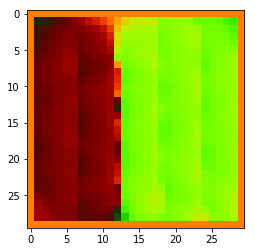

In [104]:

t = 1121

u = mean_flow(U, t) 
v = mean_flow(V, t) 
c = flow_to_color(u,v)

plt.imshow(c.reshape((nx,ny,3)))
